# Libraries

In [1]:
import requests
from lxml import html
from tqdm.notebook import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

# Data

In [2]:
# Extracting wikipedia pages with title data science on it
main_subject = "Data Science"
url = "https://en.wikipedia.org/w/api.php"

params = {
            'action' : 'query',
            'format' : 'json',
            'generator' : 'links',
            'titles' : main_subject,
            'prop' : 'pageprops',
            'ppprop' : 'wikibase_item',
            'gpllimit' : 1000,
            'redirects' : 1
         }

In [3]:
r = requests.get(url, params=params)

In [4]:
r

<Response [200]>

In [5]:
r_json = r.json()

In [6]:
page_titles = [p["title"] for p in r_json["query"]["pages"].values()]

In [7]:
page_titles

['Application of Statistics and Management',
 'Academic discipline',
 'Algorithm',
 'American Statistical Association',
 'Analysis',
 'Andrew Gelman',
 'Astronomical survey',
 'Basic research',
 'Ben Fry',
 'Big data',
 'Boston',
 'Business',
 'Buzzword',
 'C. F. Jeff Wu',
 'Columbia University',
 'Comet NEOWISE',
 'Communication',
 'Computational science',
 'Computer science',
 'DJ Patil',
 'Data',
 'Data analysis',
 'Data archaeology',
 'Data augmentation',
 'Data cleansing',
 'Data collection',
 'Data compression',
 'Data corruption',
 'Data curation',
 'Data degradation',
 'Data editing',
 'Data extraction',
 'Data farming',
 'Data format management',
 'Data fusion',
 'Data integration',
 'Data integrity',
 'Data lineage',
 'Data loss',
 'Data management',
 'Data migration',
 'Data mining',
 'Data philanthropy',
 'Data pre-processing',
 'Data preservation',
 'Data publishing',
 'Data quality',
 'Data recovery',
 'Data reduction',
 'Data retention',
 'Data scraping',
 'Data scrubbin

In [8]:
# restricting to 500 articles for ease of data and computation
num_articles = 500
pages = page_titles[:num_articles]
pages += [main_subject]

# there could be repetetive topics, so removing them too
pages = list(set(pages))

In [21]:
# unique pages to look at
len(fin_pages)

122

In [20]:
# crating a text database of the chosen 500 topics
text_db = []
fin_pages = []

for page in tqdm(pages):
    try:
        response = requests.get(
                                url,
                                params = {
                                            'action' : 'parse',
                                            'page' : page,
                                            'format' : 'json',
                                            'prop' : 'text',
                                            'redirects' : ''

                                        }
                                ).json()
        doc_string = html.document_fromstring(response["parse"]["text"]["*"])
        text = ''
        for p in doc_string.xpath("//p"):
            text += p.text_content()
        text_db.append(text)
        fin_pages.append(page)
    except:
        print(page)
        pass
print("done!")

Application of Statistics and Management

done!


# Tf-IdF vectorization

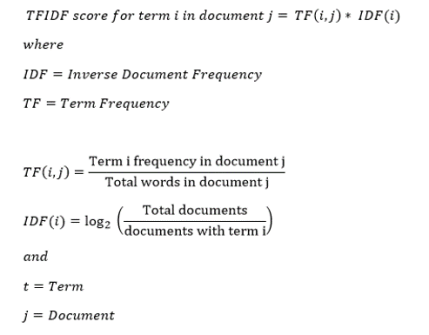

In [22]:
# Creating a Tf-Idf object
# Also note that we are creating bigrams because they can be helpful when considering only one word

tf_idf_vec = TfidfVectorizer(stop_words=stop_words,
                            ngram_range=(2,2),
                            use_idf=True)

In [23]:
# transforming the text datbase to their tf-idf

tf_idf = tf_idf_vec.fit_transform(text_db)

In [27]:
pages

['Data transformation (computing)',
 'Data preservation',
 'Information technology',
 'Ben Fry',
 'Data curation',
 'John Tukey',
 'Domain knowledge',
 'Big data',
 'Information science',
 'Women in Data',
 'Basic research',
 'Data scraping',
 'Journal of Computational and Graphical Statistics',
 'Thomas H. Davenport',
 'Extract, load, transform',
 'Data management',
 'C. F. Jeff Wu',
 'Committee on Data of the International Science Council',
 'Phenomenon',
 'Space telescope',
 'National Science Board',
 'DJ Patil',
 'Data',
 'Knowledge',
 'Data scrubbing',
 'Academic discipline',
 'Columbia University',
 'Computer science',
 'Data mining',
 'Data format management',
 'Information explosion',
 'Machine learning',
 'David Donoho',
 'Data and information visualization',
 'Scientific Data (journal)',
 'Data pre-processing',
 'Empirical research',
 'Computational science',
 'Vasant Dhar',
 'Category:Use dmy dates from August 2021',
 'ODSC',
 'Data corruption',
 'Human–computer interaction'

In [28]:
tf_idf_df = pd.DataFrame(
                            tf_idf.toarray(),
                            columns=tf_idf_vec.get_feature_names(),
                            index = fin_pages
                        )

# The rows are the documents and the columns are the bigrams that we have created
# The row can be looked at like the tf-idf score of the all the bigrams for different documents

tf_idf_df

,00 one,000 000,000 11,000 14,000 16,000 1865,000 1883,000 1896,000 1934,000 1973,...,μαθηματικὴ τέχνη,πληροφορική means,τέχνη latin,τὰ μαθηματικά,דעת da,علم ʿilm,ਐਵ little,ṭūsī 88,ἀνάλυσις analysis,ἀριθμός arithmos
Data transformation (computing),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data preservation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Information technology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ben Fry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data curation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Digital object identifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nathan Yau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Exploration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISBN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# here we look at the inverse document frequencyof the bigrams

# you can see that bigrams with higher inverse document frequency act as weights to cancel out most common elements that 
# usually occurs in the data (eg. data: in data science, data is very common that's why it has a smaller tf-idf value)

# This method is prone to errors. The last set of values are do not make much sense but still has a higher idf weights

idf_df = pd.DataFrame(
                        tf_idf_vec.idf_,
                        index = tf_idf_vec.get_feature_names_out(),
                        columns = ['idf_weights']
                    )
idf_df.sort_values(by=['idf_weights'])

,idf_weights
data data,2.315677
citation needed,2.346448
computer science,2.378197
united states,2.410987
may also,2.479980
...,...
entitled data,5.119037
entities within,5.119037
entities venues,5.119037
entities usually,5.119037


In [32]:
# NMF is non-negative matrix factorisation technique is a decomposition technique where a non-negative matrix is decomposed
# to two non-negative matrices that helps reducing the dimensionality of the input but also preserve as much as information
# as possible. The two matrices are weight and feature matrix, where the feature is less than the number of features in the
# input. The product of the two matrices yield the closest approximation of the input.

from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

n_topics = 10
nmf = NMF(n_components=n_topics,max_iter=1000)

nmf_features = nmf.fit_transform(tf_idf, )

norm_feats = normalize(nmf_features)

C:\Users\Monis\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [43]:
# If the dot product between feature vectors of two wiki-pages are high, then they are highly similar and if they are low
# then they are dissimlar
data = {}

norm_df = pd.DataFrame(norm_feats, index=fin_pages)

for page in fin_pages:
    recommendation = norm_df.loc[page, :]
    
    # computing the similarity
    
    similarities = norm_df.dot(recommendation)
    
    data[page] = []
    for k, v in dict(similarities.nlargest(5)).items():
        if k != page:
            data[page].append({'q' : k, 'similarity' : v})

In [45]:
# Top 4 similar wiki pages to data management
data['Data management']

[{'q': 'Data lineage', 'similarity': 0.9999777760984264},
 {'q': 'Big data', 'similarity': 0.9999106109462522},
 {'q': 'Data philanthropy', 'similarity': 0.9998985422134918},
 {'q': 'Buzzword', 'similarity': 0.9992022755310699}]